In [7]:
import json
import pandas as pd
import os

# Known venue to city mapping
venue_to_city = {
    "Eden Gardens": "Kolkata",
    "Lord's": "London",
    "Wankhede Stadium": "Mumbai",
    "Melbourne Cricket Ground": "Melbourne",
    "Sydney Cricket Ground": "Sydney",
    "Old Trafford": "Manchester",
    "Sharjah Cricket Stadium": "Sharjah",
    "Dubai International Cricket Stadium": "Dubai",
    "Adelaide Oval": "Adelaide",
    "The Oval": "London",
    "Pallekele International Cricket Stadium": "Pallekele",
    "R. Premadasa Stadium": "Colombo",
    "MA Chidambaram Stadium": "Chennai",
    "Newlands": "Cape Town",
    "SuperSport Park": "Centurion"
}

def extract_match_data(match_type, folder_path, output_prefix):
    all_matches = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, 'r', encoding='utf-8') as f:
                match_data = json.load(f)

            info = match_data.get('info', {})

            # Ensure correct match type
            if info.get('match_type', '').lower() != match_type.lower():
                continue

            outcome = info.get('outcome', {})
            toss = info.get('toss', {})
            officials = info.get('officials', {})

            # Result margin
            result_margin = "Null"
            if 'by' in outcome:
                if 'runs' in outcome['by']:
                    result_margin = str(outcome['by']['runs']) + " runs"
                elif 'wickets' in outcome['by']:
                    result_margin = str(outcome['by']['wickets']) + " wickets"

            # Result type
            result_type = outcome.get('result', '')
            if result_type == '':
                result_type = 'normal' if 'winner' in outcome else 'unknown'

            # Venue and city
            venue = info.get('venue', 'Null')
            city = info.get('city', '')
            if city == '':
                city = venue_to_city.get(venue, 'Null')

            match_details = {
                'Match ID': file_name.replace('.json', ''),
                'Date': info.get('dates', ['Null'])[0],
                'City': city,
                'Venue': venue,
                'Teams': ', '.join(info.get('teams', [])) or 'Null',
                'Winner': outcome.get('winner', 'Null'),
                'Result Type': result_type,
                'Result Margin': result_margin,
                'Overs': info.get('overs', 'Null'),
                'Toss Winner': toss.get('winner', 'Null'),
                'Toss Decision': toss.get('decision', 'Null'),
                'Player of Match': ', '.join(info.get('player_of_match', [])) or 'Null',
                'Umpires': ', '.join(officials.get('umpires', [])) or 'Null',
                'Match Referee': ', '.join(officials.get('match_referees', [])) or 'Null',
                'Match Type': info.get('match_type', 'Null'),
                'Gender': info.get('gender', 'Null')
            }

            all_matches.append(match_details)

    df = pd.DataFrame(all_matches)
    df.to_csv(f'{output_prefix}_matches_detailed.csv', index=False)
    df.to_excel(f'{output_prefix}_matches_detailed.xlsx', index=False)

    print(f"{match_type.upper()} match data saved as CSV and Excel successfully")




In [8]:
extract_match_data(
    'odi',
    r'C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\odis',
    'odi'
)

ODI match data saved as CSV and Excel successfully


In [9]:
extract_match_data(
    't20',
    r'C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\t20s',
    't20'
)


T20 match data saved as CSV and Excel successfully


In [10]:
extract_match_data(
    'test',
    r'C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\tests',
    'test'
)


TEST match data saved as CSV and Excel successfully


In [63]:
import mysql.connector
class cricket:
  def __init__(self,host,user,password,port,database,ssl_ca):
    self.host = host
    self.user = user
    self.password = password
    self.port = port
    self.database = database
    self.ssl_ca = ssl_ca
    self.conn = None
    self.cursor = None
  def connect(self):
    self.conn = mysql.connector.connect(host = self.host, user = self.user, password = self.password, port = self.port, database = self.database, ssl_ca = self.ssl_ca  )
    self.cursor = self.conn.cursor()
    print("connection sucessful")
  def create_table(self,table_query):
    self.cursor.execute(table_query)
    self.conn.commit()
  def insert_into_list_tuple(self,inser_query,list_tuple):
    self.cursor.executemany(inser_query,list_tuple)
    self.conn.commit()
    print("insert sucessful")

In [64]:
config ={"host":"gateway01.ap-southeast-1.prod.aws.tidbcloud.com", "user" : "2k28pcyNk66J4wT.root", "port":4000, "password":"MJfUrQWyu2HIZEBk", "database":"cricket_analysis", "ssl_ca":r"C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\isrgrootx1.pem"}
db_obj = cricket(**config)


In [65]:
db_obj.connect()

connection sucessful


In [30]:
TQ = "create table Odis_matches(Match_id varchar(50),Date DATE,City varchar(100), Venue varchar(200)," \
"Teams varchar(200),Winner varchar(100),Result_Type varchar(50),Result_Margin varchar(50)," \
"Overs TINYINT UNSIGNED,Toss_winner varchar(100),Toss_decision varchar(20)," \
"Player_of_match varchar(100),Umpires varchar(100), Match_Referee varchar(50)," \
"Match_Type varchar(20),Gender varchar(10)) "
db_obj.create_table(TQ)

In [31]:
TQ = "create table T20s_matches(Match_id varchar(50),Date DATE,City varchar(100)," \
"Venue varchar(200),Teams varchar(200),Winner varchar(100),Result_Type varchar(50), "\
"Result_Margin varchar(50),Overs TINYINT UNSIGNED,Toss_winner varchar(100),"\
"Toss_decision varchar(20),Player_of_match varchar(100),Umpires varchar(100),"\
"Match_Referee varchar(50),Match_Type varchar(20),Gender varchar(10)) "
db_obj.create_table(TQ)

In [32]:
TQ = "create table Tests_matches(Match_id varchar(50),Date DATE,City varchar(100)," \
"Venue varchar(200),Teams varchar(200),Winner varchar(100),Result_Type varchar(50), "\
"Result_Margin varchar(50),Overs TINYINT UNSIGNED,Toss_winner varchar(100),"\
"Toss_decision varchar(20),Player_of_match varchar(100),Umpires varchar(100),"\
"Match_Referee varchar(50),Match_Type varchar(20),Gender varchar(10)) "
db_obj.create_table(TQ)

In [53]:
# Load CSV into DataFrame
df_odies = pd.read_csv("odi_matches_detailed.csv")
# Prepare insert query
insert_query = """
INSERT INTO odis_matches 
(Match_id, Date, City, Venue, Teams, Winner,Result_Type,Result_Margin,Toss_winner,Overs, 
Toss_decision, Player_of_match,Umpires,Match_Referee,Match_Type,Gender) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
# Convert DataFrame to list of tuples
list_of_tuples_odies = [
    (
        row['Match ID'], row['Date'], row['City'], row['Venue'], row['Teams'],row['Winner'], 
        row['Result Type'], row['Result Margin'], row['Toss Winner'], row['Overs'] ,row['Toss Decision'], 
        row['Player of Match'],row['Umpires'],row['Match Referee'],row['Match Type'],row['Gender']
    )
    for index, row in df_odies.iterrows()
]

db_obj.insert_into_list_tuple(insert_query, list_of_tuples_odies)

insert sucessful


In [58]:
# Load CSV into DataFrame
df_t20s = pd.read_csv("t20_matches_detailed.csv")
# Prepare insert query
insert_query = """
INSERT INTO t20s_matches 
(Match_id, Date, City, Venue, Teams, Winner,Result_Type,Result_Margin,Toss_winner,Overs, 
Toss_decision, Player_of_match,Umpires,Match_Referee,Match_Type,Gender) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
# Convert DataFrame to list of tuples
list_of_tuples_t20s = [
    (
        row['Match ID'], row['Date'], row['City'], row['Venue'], row['Teams'],row['Winner'], 
        row['Result Type'], row['Result Margin'], row['Toss Winner'], row['Overs'] ,row['Toss Decision'], 
        row['Player of Match'],row['Umpires'],row['Match Referee'],row['Match Type'],row['Gender']
    )
    for index, row in df_t20s.iterrows()
]

db_obj.insert_into_list_tuple(insert_query, list_of_tuples_t20s)

insert sucessful


In [66]:
import pandas as pd

# Load CSV into DataFrame
df_tests = pd.read_csv("test_matches_detailed.csv")

# Clean and rename columns
df_tests.rename(columns={
    'Match ID': 'Match_id',
    'Result Type': 'Result_Type',
    'Result Margin': 'Result_Margin',
    'Toss Winner': 'Toss_winner',
    'Toss Decision': 'Toss_decision',
    'Player of Match': 'Player_of_match',
    'Match Referee': 'Match_Referee',
    'Match Type': 'Match_Type'
}, inplace=True)

# Replace invalid string values with None (NULL in MySQL)
df_tests.replace({'Null': None, '?': None, '': None}, inplace=True)

# Ensure Overs is numeric and compatible
df_tests['Overs'] = pd.to_numeric(df_tests['Overs'], errors='coerce')

# Prepare insert query
insert_query = """
INSERT INTO tests_matches 
(Match_id, Date, City, Venue, Teams, Winner, Result_Type, Result_Margin, Toss_winner, Overs, 
Toss_decision, Player_of_match, Umpires, Match_Referee, Match_Type, Gender) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Convert DataFrame to list of tuples
list_of_tuples_test = [
    (
        row['Match_id'], row['Date'], row['City'], row['Venue'], row['Teams'], row['Winner'], 
        row['Result_Type'], row['Result_Margin'], row['Toss_winner'], row['Overs'],
        row['Toss_decision'], row['Player_of_match'], row['Umpires'], 
        row['Match_Referee'], row['Match_Type'], row['Gender']
    )
    for _, row in df_tests.iterrows()
]

# Insert into DB
db_obj.insert_into_list_tuple(insert_query, list_of_tuples_test)


insert sucessful


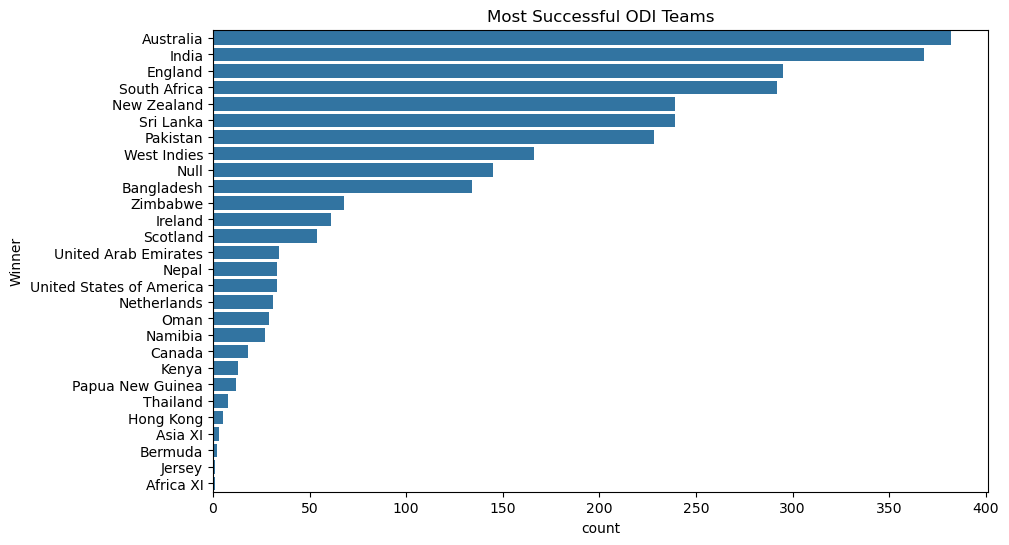

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matches per winner
plt.figure(figsize=(10,6))
sns.countplot(y='Winner', data=df_odies , order=df_odies ['Winner'].value_counts().index)
plt.title('Most Successful ODI Teams')
plt.show()


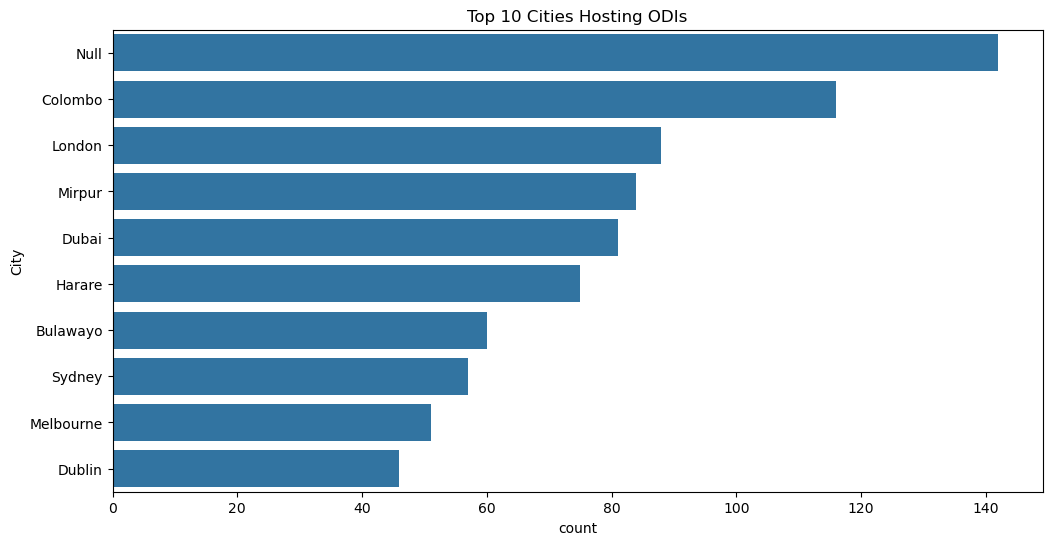

In [69]:
# 2. Top Cities Hosting Matches
plt.figure(figsize=(12,6))
sns.countplot(y='City', data=df_odies, order=df_odies['City'].value_counts().index[:10])
plt.title('Top 10 Cities Hosting ODIs')
plt.show()

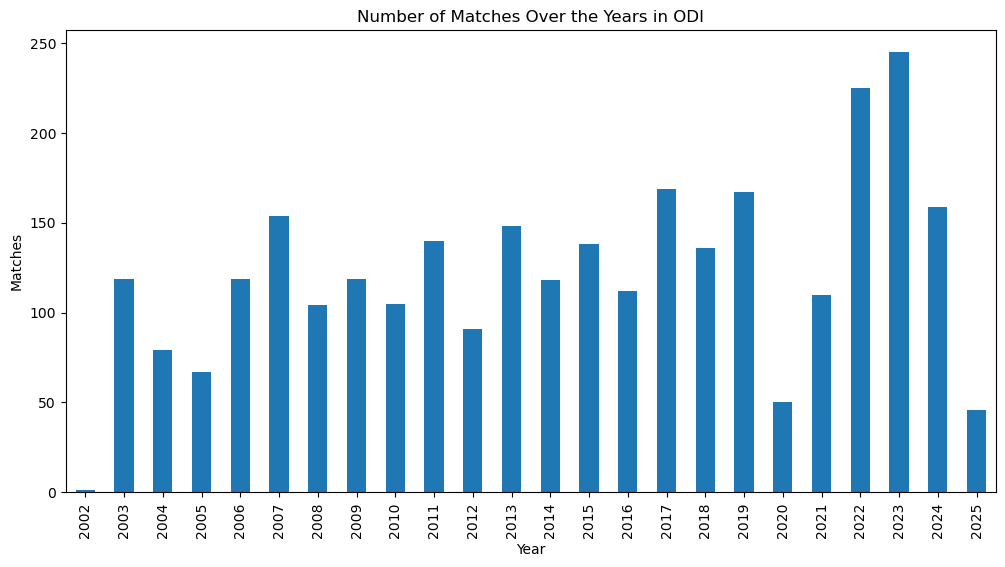

In [70]:
# 3. Matches over Years
df_odies['year'] = pd.to_datetime(df_odies['Date']).dt.year
df_odies['year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Number of Matches Over the Years in ODI')
plt.xlabel('Year')
plt.ylabel('Matches')
plt.show()

In [71]:
print("Total Matches:", len(df_odies))


Total Matches: 2921


In [72]:
print(df_odies['City'].value_counts())


City
Null                  142
Colombo               116
London                 88
Mirpur                 84
Dubai                  81
                     ... 
Katunayake              1
Tarouba                 1
Kathmandu               1
Raipur                  1
FTZ Sports Complex      1
Name: count, Length: 170, dtype: int64


In [73]:
print("Most Frequent Winner:\n", df_odies['Winner'].value_counts().head())


Most Frequent Winner:
 Winner
Australia       382
India           368
England         295
South Africa    292
New Zealand     239
Name: count, dtype: int64


In [74]:
print(df_odies['Toss Decision'].value_counts())


Toss Decision
field    1479
bat      1442
Name: count, dtype: int64


In [75]:
print(df_odies['Player of Match'].value_counts().head())


Player of Match
Null              211
V Kohli            43
KC Sangakkara      26
AB de Villiers     26
RG Sharma          25
Name: count, dtype: int64


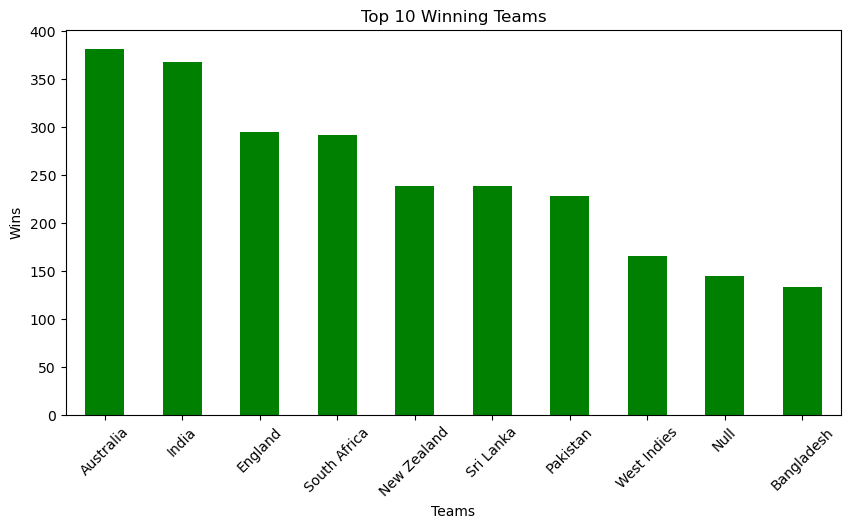

In [77]:
# Top Winners
df_odies['Winner'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='green')
plt.title("Top 10 Winning Teams")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from fpdf import FPDF
from fpdf.enums import XPos, YPos

# Initialize PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Helvetica", size=12)  # Avoid deprecated Arial fallback

# Title
pdf.cell(200, 10, text="Cricsheet ODI Matches Report", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align="C")

# Total Matches
pdf.cell(200, 10, text=f"Total Matches: {len(df_odies)}", new_x=XPos.LEFT, new_y=YPos.NEXT, align="L")

# Most Frequent Winner
pdf.cell(200, 10, text=f"Most Frequent Winner: {most_winner}", new_x=XPos.LEFT, new_y=YPos.NEXT, align="L")

# Save
pdf.output("Cricsheet_ODI_Report.pdf")

print("PDF Report Generated Successfully without Warnings ")


PDF Report Generated Successfully without Warnings 


In [ ]:
from fpdf import FPDF
from fpdf.enums import XPos, YPos

# Create instance of FPDF
pdf = FPDF()
pdf.add_page()

# Use Helvetica instead of Arial (Arial is not included)
pdf.set_font("Helvetica", size=12)

# Title
pdf.cell(200, 10, text="ODI Match Summary", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align='C')

# Example dictionary to print (replace with your actual data)
summary = {
    "Total Matches": len(df_odies),
    "Most Frequent Winner": most_winner
}

# Print all items
for key, value in summary.items():
    pdf.cell(200, 10, text=f"{key}: {value}", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

# Save PDF
pdf.output("ODI_Summary_Report.pdf")

print("PDF Generated Successfully (No Deprecation Warning)")


PDF Generated Successfully ✅ (No Deprecation Warning)
